In [11]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

🔹  <b>StandardScaler</b>: Scales features to have zero mean and unit variance (z-score normalization).
    Ideal when data is normally distributed or for gradient-based models.

🔹 <b>MinMaxScaler:</b> Rescales features to a [0, 1] range based on min and max values.
    Preserves shape but sensitive to outliers.

🔹 <b>RobustScaler:</b> Scales features using median and interquartile range (IQR).
    More resistant to outliers than Standard or MinMax scaling.

🔹 <b>Normalizer:</b> Scales each sample (row) to have unit norm (L2 by default).
    Used when vector direction matters more than magnitude (e.g. in NLP or cosine similarity).

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "Normalizer": Normalizer()
}

scaled_dfs = {}
for name, scaler in scalers.items():
    scaled = scaler.fit_transform(df.drop(columns="target"))
    scaled_dfs[name] = pd.DataFrame(scaled, columns=df.columns[:-1])

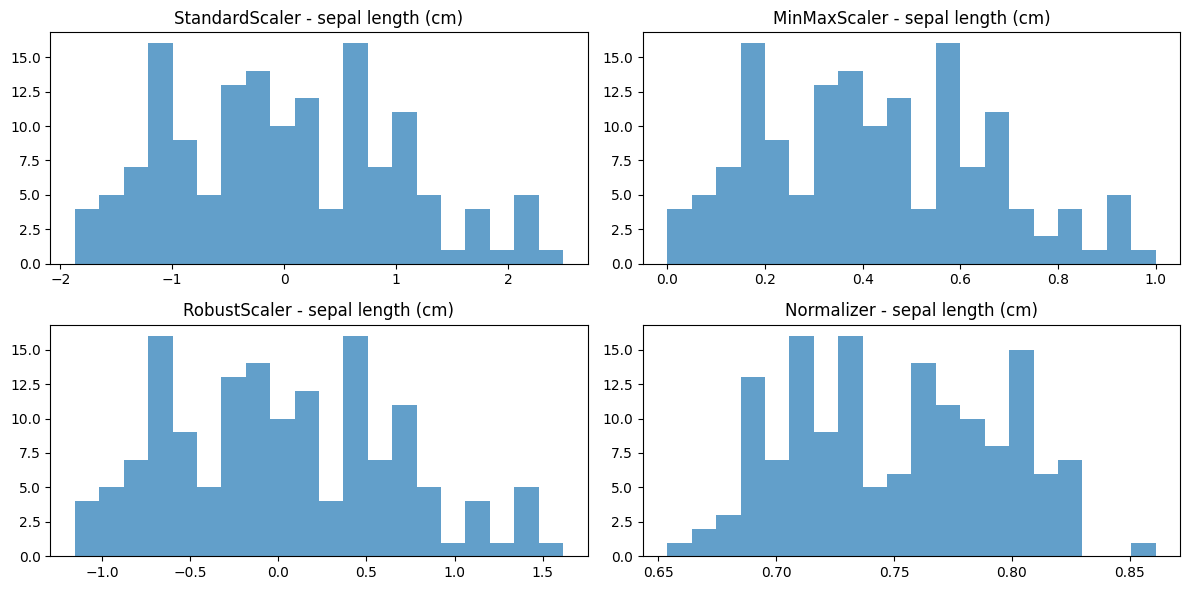

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, (name, sdf) in enumerate(scaled_dfs.items(), 1):
    plt.subplot(2, 2, i)
    plt.hist(sdf.iloc[:, 0], bins=20, alpha=0.7)
    plt.title(f"{name} - {df.columns[0]}")
plt.tight_layout()
plt.show()

<b>StandardScaler:</b>
The distribution is centered around 0, with most values between -2 and 2. The shape of the original distribution is preserved, but it’s rescaled to zero mean and unit variance.

<b>MinMaxScaler:</b>
The feature values are rescaled to fall strictly within the [0, 1] range. The overall shape of the distribution remains the same, but it's compressed or stretched to fit the new bounds.

<b>RobustScaler:</b>
The distribution is centered around the median and scaled based on the interquartile range (IQR). This makes it more resistant to outliers, which don’t heavily influence the scaling.

<b>Normalizer:</b>
Each row (sample) is scaled independently to have unit L2 norm. As a result, values are compressed into a narrow band (e.g., ~0.65 to 0.85), and the original feature distribution is heavily altered.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_raw = df.drop(columns="target")
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

# No scaling
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Accuracy without scaling:", accuracy_score(y_test, knn.predict(X_test)))

# With StandardScaler
X_scaled = StandardScaler().fit_transform(X_raw)
X_train_s, X_test_s, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn.fit(X_train_s, y_train)
print("Accuracy with StandardScaler:", accuracy_score(y_test, knn.predict(X_test_s)))

Accuracy without scaling: 1.0
Accuracy with StandardScaler: 1.0


Why scaling does not make a difference in this case? <b>Because feature ranges are not dramatically imbalanced, and the Euclidean distance does not get skewed much.</b>

We can try with another dataset where scaling matters.

In [15]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

In [16]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X = df.drop(columns="target")
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# No scaling
model = Ridge()
model.fit(X_train, y_train)
print("MSE (no scaling):", mean_squared_error(y_test, model.predict(X_test)))

# With scaling
X_scaled = StandardScaler().fit_transform(X)
X_train_s, X_test_s, _, _ = train_test_split(X_scaled, y, random_state=42)
model.fit(X_train_s, y_train)
print("MSE (with scaling):", mean_squared_error(y_test, model.predict(X_test_s)))

MSE (no scaling): 3105.4721464484733
MSE (with scaling): 2842.892646167096


Now we see a difference and improvement when scaled vs not scaled.

<b>Scaling improves performance when the model is sensitive to feature magnitudes, especially when using regularisation like Ridge, or distance-based methods like KNN, SVM, etc.</b>